# Google Data Analytics Cyclistic Capstone

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
data = pd.read_csv('C:/Users/JAMMITHRI/OneDrive/Documents/merged_file.csv')

In [6]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
            ride_id rideable_type        started_at          ended_at  \
0  A847FADBBC638E45   docked_bike  26-04-2020 17:45  26-04-2020 18:12   
1  5405B80E996FF60D   docked_bike  17-04-2020 17:08  17-04-2020 17:17   
2  5DD24A79A4E006F4   docked_bike  01-04-2020 17:54  01-04-2020 18:08   
3  2A59BBDF5CDBA725   docked_bike  07-04-2020 12:50  07-04-2020 13:02   
4  27AD306C119C6158   docked_bike  18-04-2020 10:22  18-04-2020 11:15   

             start_station_name  start_station_id  \
0                  Eckhart Park              86.0   
1     Drake Ave & Fullerton Ave             503.0   
2          McClurg Ct & Erie St             142.0   
3  California Ave & Division St             216.0   
4          Rush St & Hubbard St             125.0   

              end_station_name  end_station_id  start_lat  start_lng  end_lat  \
0  Lincoln Ave & Diversey Pkwy           152.0    41.8964   -87.6610  41.9322   
1              Kosciuszko Park           499.0   

In [9]:
import pandas as pd

# Convert 'started_at' and 'ended_at' columns to datetime objects with the specified format
data['started_at'] = pd.to_datetime(data['started_at'], format='%y-%m-%d %H:%M')
data['ended_at'] = pd.to_datetime(data['ended_at'], format='%y-%m-%d %H:%M')

# Calculate the time taken between 'started_at' and 'ended_at' in minutes
data['ride_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60


In [10]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
            ride_id rideable_type          started_at            ended_at  \
0  A847FADBBC638E45   docked_bike 2020-04-26 17:45:00 2020-04-26 18:12:00   
1  5405B80E996FF60D   docked_bike 2020-04-17 17:08:00 2020-04-17 17:17:00   
2  5DD24A79A4E006F4   docked_bike 2020-04-01 17:54:00 2020-04-01 18:08:00   
3  2A59BBDF5CDBA725   docked_bike 2020-04-07 12:50:00 2020-04-07 13:02:00   
4  27AD306C119C6158   docked_bike 2020-04-18 10:22:00 2020-04-18 11:15:00   

             start_station_name  start_station_id  \
0                  Eckhart Park              86.0   
1     Drake Ave & Fullerton Ave             503.0   
2          McClurg Ct & Erie St             142.0   
3  California Ave & Division St             216.0   
4          Rush St & Hubbard St             125.0   

              end_station_name  end_station_id  start_lat  start_lng  end_lat  \
0  Lincoln Ave & Diversey Pkwy           152.0    41.8964   -87.6610  41.9322   
1              Kosciuszko

In [11]:
#Dataset shape (number of rows and columns)
print("Shape of the dataset (rows, columns):", data.shape)

Shape of the dataset (rows, columns): (1048575, 14)


In [12]:
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             1048575 non-null  object        
 1   rideable_type       1048575 non-null  object        
 2   started_at          1048575 non-null  datetime64[ns]
 3   ended_at            1048575 non-null  datetime64[ns]
 4   start_station_name  1048444 non-null  object        
 5   start_station_id    1048441 non-null  float64       
 6   end_station_name    1046953 non-null  object        
 7   end_station_id      1046951 non-null  float64       
 8   start_lat           1048575 non-null  float64       
 9   start_lng           1048575 non-null  float64       
 10  end_lat             1047122 non-null  float64       
 11  end_lng             1047122 non-null  float64       
 12  member_casual       1048575 non-null  

In [13]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name     131
start_station_id       134
end_station_name      1622
end_station_id        1624
start_lat                0
start_lng                0
end_lat               1453
end_lng               1453
member_casual            0
ride_duration            0
dtype: int64


In [14]:
#Count the number of null values in each row
null_rows = data.isnull().sum(axis=1)

#Total no of rows with null values
total_rows_with_null = null_rows[null_rows > 0].count()

print("Total number of rows with null values:", total_rows_with_null)

Total number of rows with null values: 1700


In [15]:
#Total number of rows with null values
total_rows_with_null = null_rows[null_rows > 0].count()
print(total_rows_with_null)

#Total no of rows in the dataset
total_rows = len(data)
print(total_rows)

#calculate the percentage of null rows
percentage_null_rows = (total_rows_with_null / total_rows) * 100

print("percentage of null rows:", percentage_null_rows)

1700
1048575
percentage of null rows: 0.16212478840330924


In [16]:
#Remove rows with the null values
cleaned_data = data.dropna()

print("shape of the cleaned dataset (rows, columns):", cleaned_data.shape)

shape of the cleaned dataset (rows, columns): (1046875, 14)


In [17]:
print("First few rows of the cleaned dataset:")
print(cleaned_data.head())

First few rows of the cleaned dataset:
            ride_id rideable_type          started_at            ended_at  \
0  A847FADBBC638E45   docked_bike 2020-04-26 17:45:00 2020-04-26 18:12:00   
1  5405B80E996FF60D   docked_bike 2020-04-17 17:08:00 2020-04-17 17:17:00   
2  5DD24A79A4E006F4   docked_bike 2020-04-01 17:54:00 2020-04-01 18:08:00   
3  2A59BBDF5CDBA725   docked_bike 2020-04-07 12:50:00 2020-04-07 13:02:00   
4  27AD306C119C6158   docked_bike 2020-04-18 10:22:00 2020-04-18 11:15:00   

             start_station_name  start_station_id  \
0                  Eckhart Park              86.0   
1     Drake Ave & Fullerton Ave             503.0   
2          McClurg Ct & Erie St             142.0   
3  California Ave & Division St             216.0   
4          Rush St & Hubbard St             125.0   

              end_station_name  end_station_id  start_lat  start_lng  end_lat  \
0  Lincoln Ave & Diversey Pkwy           152.0    41.8964   -87.6610  41.9322   
1              Ko

In [18]:
print("\nMissing values:")
print(cleaned_data.isnull().sum())


Missing values:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_duration         0
dtype: int64


In [19]:
print("\nInformation about the dataset:")
print(cleaned_data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1046875 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             1046875 non-null  object        
 1   rideable_type       1046875 non-null  object        
 2   started_at          1046875 non-null  datetime64[ns]
 3   ended_at            1046875 non-null  datetime64[ns]
 4   start_station_name  1046875 non-null  object        
 5   start_station_id    1046875 non-null  float64       
 6   end_station_name    1046875 non-null  object        
 7   end_station_id      1046875 non-null  float64       
 8   start_lat           1046875 non-null  float64       
 9   start_lng           1046875 non-null  float64       
 10  end_lat             1046875 non-null  float64       
 11  end_lng             1046875 non-null  float64       
 12  member_casual       1046875 non-null  objec

In [22]:
cleaned_data['day_of_week'] = cleaned_data['started_at'].dt.dayofweek

# Display the first few rows of the dataset with the new column
print("First few rows of the dataset with the new column 'day_of_week':")
print(cleaned_data.head())

First few rows of the dataset with the new column 'day_of_week':
            ride_id rideable_type          started_at            ended_at  \
0  A847FADBBC638E45   docked_bike 2020-04-26 17:45:00 2020-04-26 18:12:00   
1  5405B80E996FF60D   docked_bike 2020-04-17 17:08:00 2020-04-17 17:17:00   
2  5DD24A79A4E006F4   docked_bike 2020-04-01 17:54:00 2020-04-01 18:08:00   
3  2A59BBDF5CDBA725   docked_bike 2020-04-07 12:50:00 2020-04-07 13:02:00   
4  27AD306C119C6158   docked_bike 2020-04-18 10:22:00 2020-04-18 11:15:00   

             start_station_name  start_station_id  \
0                  Eckhart Park              86.0   
1     Drake Ave & Fullerton Ave             503.0   
2          McClurg Ct & Erie St             142.0   
3  California Ave & Division St             216.0   
4          Rush St & Hubbard St             125.0   

              end_station_name  end_station_id  start_lat  start_lng  end_lat  \
0  Lincoln Ave & Diversey Pkwy           152.0    41.8964   -87.6610  41

C:\Users\JAMMITHRI\AppData\Local\Temp\ipykernel_30004\3756622054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['day_of_week'] = cleaned_data['started_at'].dt.dayofweek


In [23]:
weekday_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
cleaned_data['weekday_name'] = cleaned_data['day_of_week'].map(weekday_names)

print("First few rows of the dataset with the new column 'weekday_name':")
print(cleaned_data.head())

First few rows of the dataset with the new column 'weekday_name':
            ride_id rideable_type          started_at            ended_at  \
0  A847FADBBC638E45   docked_bike 2020-04-26 17:45:00 2020-04-26 18:12:00   
1  5405B80E996FF60D   docked_bike 2020-04-17 17:08:00 2020-04-17 17:17:00   
2  5DD24A79A4E006F4   docked_bike 2020-04-01 17:54:00 2020-04-01 18:08:00   
3  2A59BBDF5CDBA725   docked_bike 2020-04-07 12:50:00 2020-04-07 13:02:00   
4  27AD306C119C6158   docked_bike 2020-04-18 10:22:00 2020-04-18 11:15:00   

             start_station_name  start_station_id  \
0                  Eckhart Park              86.0   
1     Drake Ave & Fullerton Ave             503.0   
2          McClurg Ct & Erie St             142.0   
3  California Ave & Division St             216.0   
4          Rush St & Hubbard St             125.0   

              end_station_name  end_station_id  start_lat  start_lng  end_lat  \
0  Lincoln Ave & Diversey Pkwy           152.0    41.8964   -87.6610  4

C:\Users\JAMMITHRI\AppData\Local\Temp\ipykernel_30004\4246576257.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['weekday_name'] = cleaned_data['day_of_week'].map(weekday_names)


In [24]:
cleaned_data['month'] = cleaned_data['started_at'].dt.month

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
cleaned_data['month_name'] = cleaned_data['month'].map(month_names)
print("First few rows of the dataset with the new column 'month_name':")
print(cleaned_data.head())

First few rows of the dataset with the new column 'month_name':
            ride_id rideable_type          started_at            ended_at  \
0  A847FADBBC638E45   docked_bike 2020-04-26 17:45:00 2020-04-26 18:12:00   
1  5405B80E996FF60D   docked_bike 2020-04-17 17:08:00 2020-04-17 17:17:00   
2  5DD24A79A4E006F4   docked_bike 2020-04-01 17:54:00 2020-04-01 18:08:00   
3  2A59BBDF5CDBA725   docked_bike 2020-04-07 12:50:00 2020-04-07 13:02:00   
4  27AD306C119C6158   docked_bike 2020-04-18 10:22:00 2020-04-18 11:15:00   

             start_station_name  start_station_id  \
0                  Eckhart Park              86.0   
1     Drake Ave & Fullerton Ave             503.0   
2          McClurg Ct & Erie St             142.0   
3  California Ave & Division St             216.0   
4          Rush St & Hubbard St             125.0   

              end_station_name  end_station_id  start_lat  start_lng  end_lat  \
0  Lincoln Ave & Diversey Pkwy           152.0    41.8964   -87.6610  41.

C:\Users\JAMMITHRI\AppData\Local\Temp\ipykernel_30004\2706178739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['month'] = cleaned_data['started_at'].dt.month
C:\Users\JAMMITHRI\AppData\Local\Temp\ipykernel_30004\2706178739.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['month_name'] = cleaned_data['month'].map(month_names)


In [25]:
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1046875 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             1046875 non-null  object        
 1   rideable_type       1046875 non-null  object        
 2   started_at          1046875 non-null  datetime64[ns]
 3   ended_at            1046875 non-null  datetime64[ns]
 4   start_station_name  1046875 non-null  object        
 5   start_station_id    1046875 non-null  float64       
 6   end_station_name    1046875 non-null  object        
 7   end_station_id      1046875 non-null  float64       
 8   start_lat           1046875 non-null  float64       
 9   start_lng           1046875 non-null  float64       
 10  end_lat             1046875 non-null  float64       
 11  end_lng             1046875 non-null  float64       
 12  member_casual       1046875 non-null  object        
 13  ride_duration    

In [26]:
cleaned_data['ride_duration'] = cleaned_data['ride_duration'].abs()
print(cleaned_data.head())

            ride_id rideable_type          started_at            ended_at  \
0  A847FADBBC638E45   docked_bike 2020-04-26 17:45:00 2020-04-26 18:12:00   
1  5405B80E996FF60D   docked_bike 2020-04-17 17:08:00 2020-04-17 17:17:00   
2  5DD24A79A4E006F4   docked_bike 2020-04-01 17:54:00 2020-04-01 18:08:00   
3  2A59BBDF5CDBA725   docked_bike 2020-04-07 12:50:00 2020-04-07 13:02:00   
4  27AD306C119C6158   docked_bike 2020-04-18 10:22:00 2020-04-18 11:15:00   

             start_station_name  start_station_id  \
0                  Eckhart Park              86.0   
1     Drake Ave & Fullerton Ave             503.0   
2          McClurg Ct & Erie St             142.0   
3  California Ave & Division St             216.0   
4          Rush St & Hubbard St             125.0   

              end_station_name  end_station_id  start_lat  start_lng  end_lat  \
0  Lincoln Ave & Diversey Pkwy           152.0    41.8964   -87.6610  41.9322   
1              Kosciuszko Park           499.0    41.924

C:\Users\JAMMITHRI\AppData\Local\Temp\ipykernel_30004\2621240599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['ride_duration'] = cleaned_data['ride_duration'].abs()


In [27]:
weekday_data = cleaned_data.groupby('weekday_name').agg({'ride_duration': 'sum', 'ride_id': 'count'})

print("Data for each weekday - Total ride time (minutes) and count of rides:")
print(weekday_data)

Data for each weekday - Total ride time (minutes) and count of rides:
              ride_duration  ride_id
weekday_name                        
Friday            5369918.0   161333
Monday            3996227.0   118892
Saturday          7846960.0   202550
Sunday            6854362.0   164903
Thursday          4875886.0   146080
Tuesday           3805483.0   123434
Wednesday         3997289.0   129683


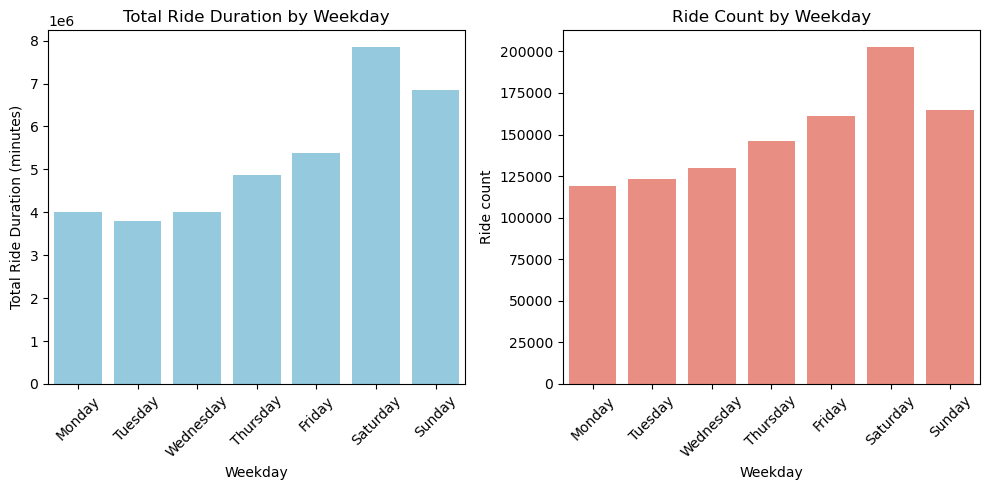

In [28]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Plot Ride Duration
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=weekday_data.index, y=weekday_data['ride_duration'], order=weekday_order, color='skyblue')
plt.title('Total Ride Duration by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Ride Duration (minutes)')
plt.xticks(rotation=45)

#Plot Ride Count
plt.subplot(1, 2, 2)
sns.barplot(x=weekday_data.index, y=weekday_data['ride_id'], order=weekday_order, color='salmon')
plt.title('Ride Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Ride count')
plt.xticks(rotation=45)

#Adjust Layout
plt.tight_layout()

#show the plots
plt.show()

In [29]:
month_data = cleaned_data.groupby('month_name').agg({'ride_duration': 'sum', 'ride_id': 'count'})

#Display the data
print("Data for each month - Total ride time (minutes) and count of rides:")
print(month_data)

Data for each month - Total ride time (minutes) and count of rides:
            ride_duration  ride_id
month_name                        
April           3013294.0    84677
July           15742833.0   419708
June           11387278.0   342537
May             6602720.0   199953


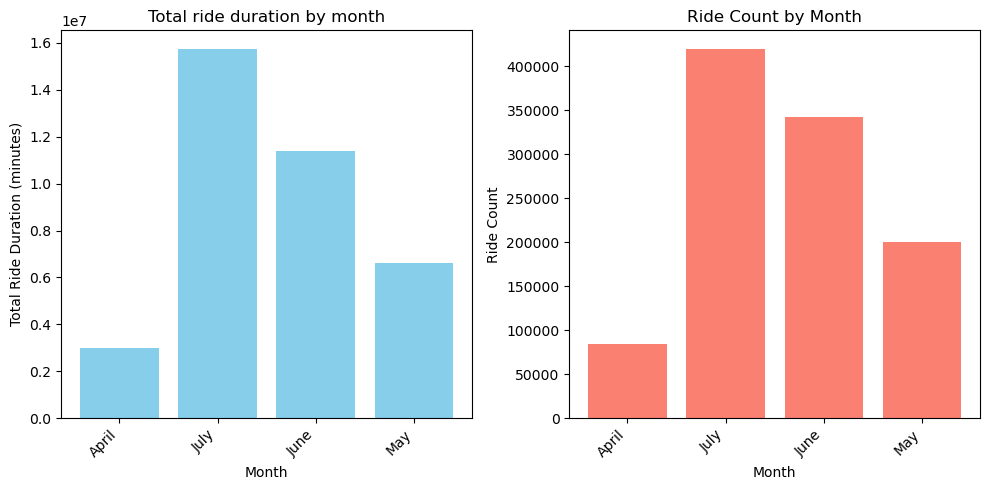

In [31]:
#Plot ride duration
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(month_data.index, month_data['ride_duration'], color='skyblue')
plt.title('Total ride duration by month')
plt.xlabel('Month')
plt.ylabel('Total Ride Duration (minutes)')
plt.xticks(rotation=45, ha='right')

#plot ride count
plt.subplot(1, 2, 2)
plt.bar(month_data.index, month_data['ride_id'], color='salmon')
plt.title('Ride Count by Month')
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.xticks(rotation=45, ha='right')

#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

In [33]:
#Group data by start station name and calculate sum of ride time and count of rates
station_duration = cleaned_data.groupby('start_station_name')['ride_duration'].sum().reset_index()
station_count = cleaned_data.groupby('start_station_name')['ride_id'].count().reset_index()

#Sort dataframes in chronological order from highest to lowest
station_duration_sorted = station_duration.sort_values(by='ride_duration', ascending=False)
station_count_sorted = station_count.sort_values(by='ride_id', ascending=False)

In [34]:
print(station_duration_sorted.head(20))

               start_station_name  ride_duration
548       Streeter Dr & Grand Ave       564400.0
284    Indiana Ave & Roosevelt Rd       457138.0
403               Millennium Park       446119.0
57            Buckingham Fountain       383386.0
327     Lake Shore Dr & Monroe St       377259.0
395        Michigan Ave & Lake St       372929.0
328    Lake Shore Dr & North Blvd       353362.0
399  Michigan Ave & Washington St       332309.0
228      Fairbanks Ct & Grand Ave       332223.0
569        Wabash Ave & Grand Ave       329143.0
534        State St & Randolph St       311594.0
570     Wabash Ave & Roosevelt Rd       295452.0
571        Wabash Ave & Wacker Pl       292257.0
397         Michigan Ave & Oak St       274419.0
124             Clark St & Elm St       254941.0
153     Columbus Dr & Randolph St       253701.0
131        Clark St & Lincoln Ave       237870.0
392         Michigan Ave & 8th St       233659.0
550           Theater on the Lake       233260.0
531          State S

In [35]:
print(station_count_sorted.head(20))

                 start_station_name  ride_id
548         Streeter Dr & Grand Ave    11317
124               Clark St & Elm St    10052
328      Lake Shore Dr & North Blvd     9120
284      Indiana Ave & Roosevelt Rd     8490
403                 Millennium Park     7668
327       Lake Shore Dr & Monroe St     7646
131          Clark St & Lincoln Ave     7499
580           Wells St & Concord Ln     7441
118         Clark St & Armitage Ave     7433
47             Broadway & Barry Ave     7428
192           Dearborn St & Erie St     7325
330  Lake Shore Dr & Wellington Ave     7216
550             Theater on the Lake     7144
343       Larrabee St & Webster Ave     7102
570       Wabash Ave & Roosevelt Rd     6966
569          Wabash Ave & Grand Ave     6926
581               Wells St & Elm St     6906
326   Lake Shore Dr & Diversey Pkwy     6730
153       Columbus Dr & Randolph St     6722
584             Wells St & Huron St     6537
